# **In this project, we want to visualize output feature maps of convolution layers in a popular CNN architecture:** ***ResNet50*** 

Step 0:
Mounting google drive into colab

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Step 1:
Importing ResNet50 from keras.applications and creat our model

In [ ]:
from keras.applications import ResNet50

model = ResNet50()

Step 2:
loop over all layers of the model, find convolution layers and save their indexes in a list.

In [ ]:
# creat an empty list of indexes
conv_layer_idx = []
#loop over layers
for i in range(len(model.layers)):
  layer = model.layers[i]
	#find convolution layesr
  if '_conv' not in layer.name:
    continue
	#save index of convolotion layer in the list
  conv_layer_idx.append(i)
  #print layer secifications
  print(i, layer.name, layer.output.shape)
#print list of convolutional layers' indexes  
print(conv_layer_idx)

2 conv1_conv (None, 112, 112, 64)
7 conv2_block1_1_conv (None, 56, 56, 64)
10 conv2_block1_2_conv (None, 56, 56, 64)
13 conv2_block1_0_conv (None, 56, 56, 256)
14 conv2_block1_3_conv (None, 56, 56, 256)
19 conv2_block2_1_conv (None, 56, 56, 64)
22 conv2_block2_2_conv (None, 56, 56, 64)
25 conv2_block2_3_conv (None, 56, 56, 256)
29 conv2_block3_1_conv (None, 56, 56, 64)
32 conv2_block3_2_conv (None, 56, 56, 64)
35 conv2_block3_3_conv (None, 56, 56, 256)
39 conv3_block1_1_conv (None, 28, 28, 128)
42 conv3_block1_2_conv (None, 28, 28, 128)
45 conv3_block1_0_conv (None, 28, 28, 512)
46 conv3_block1_3_conv (None, 28, 28, 512)
51 conv3_block2_1_conv (None, 28, 28, 128)
54 conv3_block2_2_conv (None, 28, 28, 128)
57 conv3_block2_3_conv (None, 28, 28, 512)
61 conv3_block3_1_conv (None, 28, 28, 128)
64 conv3_block3_2_conv (None, 28, 28, 128)
67 conv3_block3_3_conv (None, 28, 28, 512)
71 conv3_block4_1_conv (None, 28, 28, 128)
74 conv3_block4_2_conv (None, 28, 28, 128)
77 conv3_block4_3_conv (Non

Step 3: choosing some convolutional layers to get their output feature map. in fact here we are shrinking the model from the input to the selected layer.

In [ ]:
#importing necessary libraries
from keras.models import Model

#choosing layers from 1st, 25th, 50th, 75th and 99th percentile of layers to get a clear picture of the process
ixs = [conv_layer_idx[0], conv_layer_idx[int(len(conv_layer_idx)/4)], conv_layer_idx[int(len(conv_layer_idx)/2)], conv_layer_idx[int(3*len(conv_layer_idx)/4)], conv_layer_idx[-1]]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)

Step 4: loading a single image as input and processing the image to be fed into the model.

In [ ]:
#importing necessary libraries
from keras.applications.resnet import preprocess_input
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from numpy import expand_dims

#loading the input image and resizing it to fit the model's input size
img = load_img('/content/drive/My Drive/CNN_visualizer/3/cat.jpg', target_size=(224, 224))
#converting input into numpy array 
img = img_to_array(img)
#since we are using a single input, we need to let the model know this by adding a new dimension to it
img = expand_dims(img, axis=0)
#processing input image for resnet model
img = preprocess_input(img)

Step 5: feeding input to the network and get output feature maps of selected convolutional layers

In [ ]:
feature_maps = model.predict(img)

1/1 [==============================] - 1s 865ms/step


Step 6: plotting feature maps. Since the number of filters is a power of 2 (e.g. 32, 64, 128, 256, 512, 1024, ...), plotting all of output feature maps is not reasonable. To achieve a good intuition of conv_layer outputs across the network, viewing just some of them would be sufficient for each layer. Therfore, I decided to plot only 25 feature maps of each layer in a 5*5 grid. 

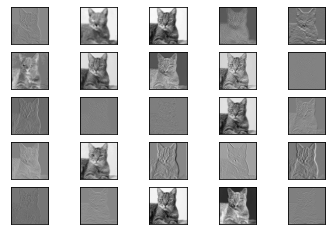

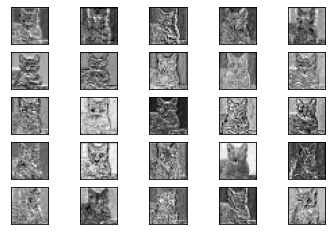

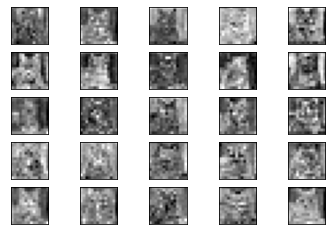

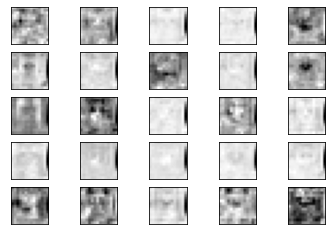

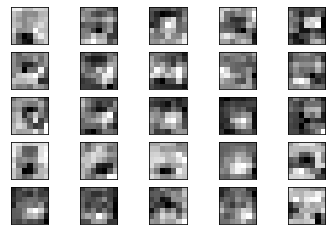

In [ ]:
#importing necessary libraries
from matplotlib import pyplot

fmap_count = 0
for fmap in feature_maps:
  length = 5
  width = 5
  #plotting 25 feature maps in a 5x5 grid
  ix = 1
  for l in range(length):
    for w in range(width):
      #creating subplot
      ax = pyplot.subplot(length, width, ix)
      #removing axis numbering from plots
      ax.set_xticks([]) 
      ax.set_yticks([])
      #plotting feature maps in grayscale
      pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
      #save each output map in a PDF file to save the quality of images
      if ix == 25:
        pyplot.savefig("/content/drive/My Drive/CNN_visualizer/3/fmap_layer" + str(ixs[fmap_count]) +'.pdf')
      ix += 1
  fmap_count += 1
 # show the figure
  pyplot.show()